In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [22]:
# read the data
# print 5 head
song_df = pd.read_csv("../../data/processed/song_clean.csv")

In [23]:
song_df.head()

,Unnamed: 0.1,Unnamed: 0,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,popular genre
0,0,0,mukesh,mohabbat bhi jhoothi,1950,pop,0.000598,0.063746,0.000598,0.000598,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0,pop
1,1,4,frankie laine,i believe,1950,pop,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0,pop
2,2,6,johnnie ray,cry,1950,pop,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0,pop
3,3,10,pérez prado,patricia,1950,pop,0.048249,0.001548,0.001548,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0,pop
4,4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.001350,0.001350,0.417772,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0,pop


In [24]:
song_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'artist_name', 'track_name',
       'release_date', 'genre', 'dating', 'violence', 'world/life',
       'night/time', 'shake the audience', 'family/gospel', 'romantic',
       'communication', 'obscene', 'music', 'movement/places',
       'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings',
       'topic', 'age', 'popular genre'],
      dtype='object')

In [25]:
# drop columns, we don't need
song_df_drop = song_df.copy()
song_df.drop(['Unnamed: 0.1', 'Unnamed: 0',  'popular genre'], axis = 1, inplace = True)
song_df.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'dating',
       'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [26]:
#Select a subset of columns to use in the clustering process
columns = ["age",  "release_date", "dating","music", "romantic","violence","family/spiritual", "family/gospel", "sadness"]
new_song_df = song_df[columns]

# Normalize the values of each column
new_song_df = (new_song_df - new_song_df.mean()) / new_song_df.std()#

In [27]:
# Initialize an empty list to store the sum of squared distances for each number of clusters
sse = [] 

# Fit the KMeans model to the data with a range of different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_song_df)
    sse.append(kmeans.inertia_)  # Add the sum of squared distances for the current number of clusters to the list

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

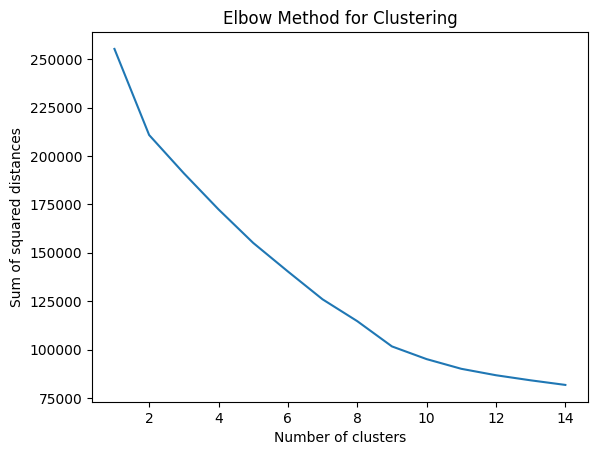

In [28]:
# Plot the sum squared distances for each number of clusters for elbow method

plt.plot(range(1, 15), sse)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


In [29]:
# Initialize the KMeans model with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=1)

# Fit the model to the data
kmeans.fit(new_song_df)  

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1)

In [30]:
# Generate cluster assignments for each data point
clusters = kmeans.predict(new_song_df)

# Print the cluster assignments for the first few data points
print(clusters[:10])

[0 0 5 4 4 0 0 0 4 0]


In [31]:
# Calculate the silhouette score for the generated clusters
silhouette_score(new_song_df, clusters)

0.24281975255635782

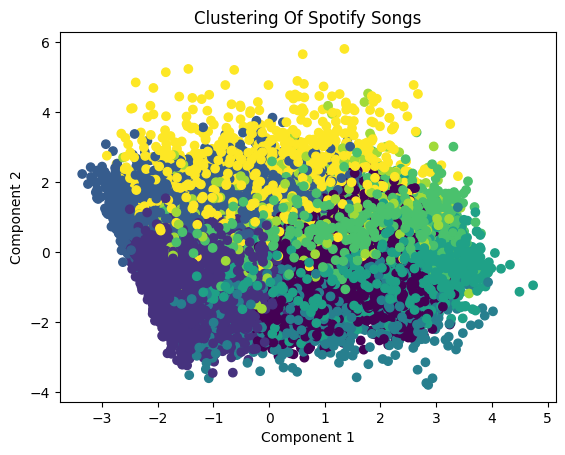

In [32]:
# To visualize the generated clusters, we will first need to reduce the data to two dimensions
# so that we can plot it on a scatter plot

pca = PCA(n_components=2)  # Initialize a PCA model with 2 components
df_2d = pca.fit_transform(new_song_df)  # Reduce the data to two dimensions using the PCA model

# Plot the data points on a scatter plot
# Coloring the data points according to their cluster assignment
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=clusters)
plt.title('Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

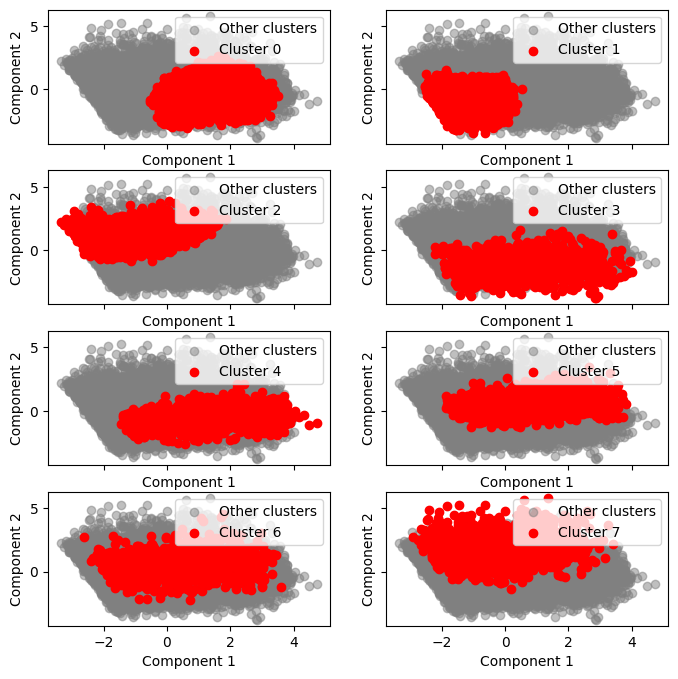

In [33]:
# Get the unique cluster assignments
unique_clusters = np.unique(clusters)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 8), sharex=True, sharey=True)

# Flatten the array of subplots to make it easier to iterate over
axs = axs.flatten()

# Iterate over the clusters
for i, cluster in enumerate(unique_clusters):
    # Select the data points belonging to the current cluster
    df_cluster = df_2d[clusters == cluster]
    
    # Select the data points belonging to other clusters
    df_other_clusters = df_2d[clusters != cluster]
    
    # Plot the data points belonging to other clusters in gray
    axs[i].scatter(df_other_clusters[:, 0], df_other_clusters[:, 1], c='gray', label='Other clusters', alpha=0.5)
    
    # Plot the data points belonging to the current cluster with a different color
    axs[i].scatter(df_cluster[:, 0], df_cluster[:, 1], c='red', label='Cluster {}'.format(cluster))
    
    # Set the x and y labels for the current subplot
    axs[i].set_xlabel('Component 1')
    axs[i].set_ylabel('Component 2')
    
    # Add a legend to the current subplot
    axs[i].legend()

plt.show()

              age  release_date    dating     music  romantic  violence  \
cluster                                                                   
0        0.871420     -0.871420 -0.168536 -0.253441 -0.158605 -0.405305   
1       -0.899971      0.899971 -0.155151 -0.281095 -0.264125 -0.412883   
2       -0.362761      0.362761 -0.247537 -0.312943 -0.276386  1.755711   
3        0.256158     -0.256158  3.706712 -0.106825 -0.015183 -0.357381   
4        0.655334     -0.655334 -0.037319 -0.186760  3.252887 -0.510598   
5        0.446128     -0.446128 -0.143437  2.819964 -0.202965 -0.469108   
6        0.247487     -0.247487 -0.081663 -0.078021 -0.131610 -0.107731   
7        0.103988     -0.103988 -0.234274 -0.073520 -0.260086  0.202564   

         family/spiritual  family/gospel   sadness  
cluster                                             
0               -0.204053      -0.170952  0.480216  
1               -0.213924      -0.163102  0.083355  
2               -0.092347      -0.175

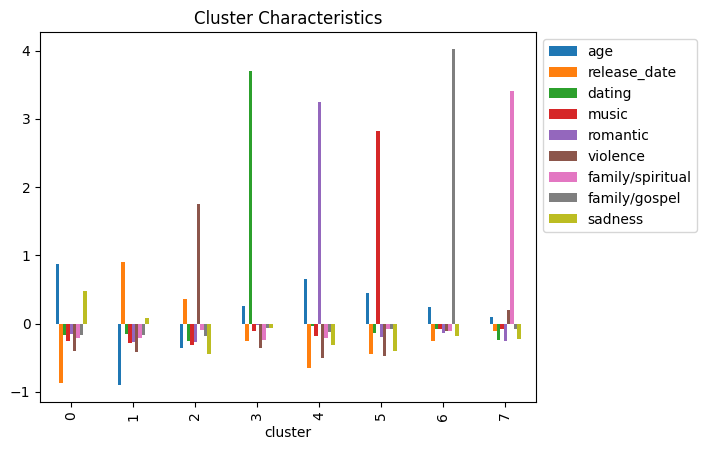

In [34]:
# First, let's create a new dataframe with the cluster assignments as a column
clustered_df = new_song_df.copy()
clustered_df['cluster'] = clusters

# Now, we can examine the characteristics of the individual clusters
# For example, we can group the data by cluster and compute the mean of each column
cluster_means = clustered_df.groupby('cluster').mean()
print(cluster_means)

# We can also compare the clusters to each other by creating a plot of the cluster means
# This can help us to see how the clusters differ from each other
cluster_means.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [37]:
new_song_df['cluster_label'] = kmeans.labels_
new_song_df.to_csv('../../data/cluster_data/clustered_data.csv', index=False)

In [38]:
#Model Creation and Training
# Instantiate the clustering algorithm (e.g., KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)  # Example: KMeans with 5 clusters

In [39]:
# Fit the model to the data
kmeans.fit(new_song_df)  

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [40]:
#sillhoute score of clusters
sillhoute_scores = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(new_song_df)
    y1 = model.predict(new_song_df)
    score = silhouette_score(new_song_df,y1)
    sillhoute_scores.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))
     

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 2 	 Sillhoute: 0.4123


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 3 	 Sillhoute: 0.2405


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 4 	 Sillhoute: 0.2607


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 5 	 Sillhoute: 0.2828


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 6 	 Sillhoute: 0.2907


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 7 	 Sillhoute: 0.3118


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 8 	 Sillhoute: 0.3290


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 9 	 Sillhoute: 0.3202


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 10 	 Sillhoute: 0.3167


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 11 	 Sillhoute: 0.3123


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 12 	 Sillhoute: 0.2954


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 13 	 Sillhoute: 0.2869


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 14 	 Sillhoute: 0.2820


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 15 	 Sillhoute: 0.2818


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 16 	 Sillhoute: 0.2540


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 17 	 Sillhoute: 0.2782


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 18 	 Sillhoute: 0.2542


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 19 	 Sillhoute: 0.2258


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 20 	 Sillhoute: 0.2211


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 21 	 Sillhoute: 0.2197


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 22 	 Sillhoute: 0.2217


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 23 	 Sillhoute: 0.2205


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 24 	 Sillhoute: 0.2117


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 25 	 Sillhoute: 0.2131


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 26 	 Sillhoute: 0.2086


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 27 	 Sillhoute: 0.2137


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 28 	 Sillhoute: 0.1942


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster: 29 	 Sillhoute: 0.2007


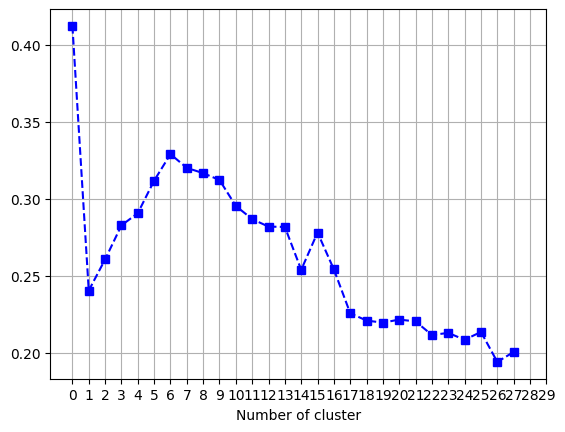

In [41]:
#Plotting Sillhoute's score
plt.plot(sillhoute_scores,'bs--')
plt.xticks(list(range(0,30)),list(range(0,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()
     

In [42]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
test_cluster_labels= kmeans.fit_predict(new_song_df)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
 #Predict the clusters and evaluate the silhouette score

score = silhouette_score(new_song_df, test_cluster_labels)
print("Silhouette score is {}".format(score))
     

Silhouette score is 0.20349044046358872


In [44]:
new_song_df['cluster_labels'] = test_cluster_labels

In [45]:
#save the modified test dataset with cluster labels for further analysis
#new_song_df.model('new_song_df2_clusters.csv', index=False)
new_song_df.to_csv("../../data/cluster_data/new_song_df2_clusters.csv", index = False)

28362